In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# 1. Load the data
data = pd.read_csv('heart.csv')

# 2. Drop missing values
data = data.dropna()

# 3. Create binary target for heart disease
data['target'] = (data['num'] > 0).astype(int)

# 4. Select features and encode categoricals
features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs',
            'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
X = data[features]
y = data['target']

categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# 5. Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6. Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# 7. Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# 8. Predict and print text results
y_pred = model.predict(X_test)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))





Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.88      0.84        32
           1       0.84      0.75      0.79        28

    accuracy                           0.82        60
   macro avg       0.82      0.81      0.81        60
weighted avg       0.82      0.82      0.82        60


Confusion Matrix:
[[28  4]
 [ 7 21]]


Accuracy: 0.8166666666666667
Precision: 0.84
Recall: 0.75
F1 Score: 0.7924528301886793
              precision    recall  f1-score   support

  No Disease       0.80      0.88      0.84        32
     Disease       0.84      0.75      0.79        28

    accuracy                           0.82        60
   macro avg       0.82      0.81      0.81        60
weighted avg       0.82      0.82      0.82        60



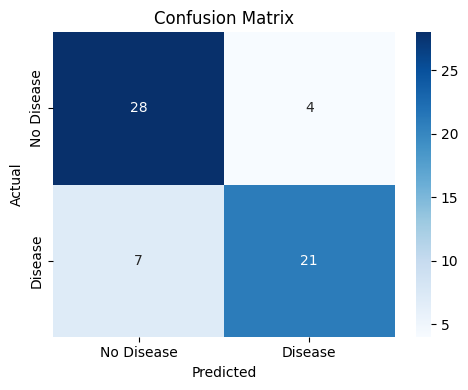

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# After you have generated y_test and y_pred:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
# Or print full report
print(classification_report(y_test, y_pred, target_names=['No Disease', 'Disease']))



cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score

